In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
# 先创造一些数据

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X - 1

这条直线就是我们要预测的直线。让我们把它画出来：

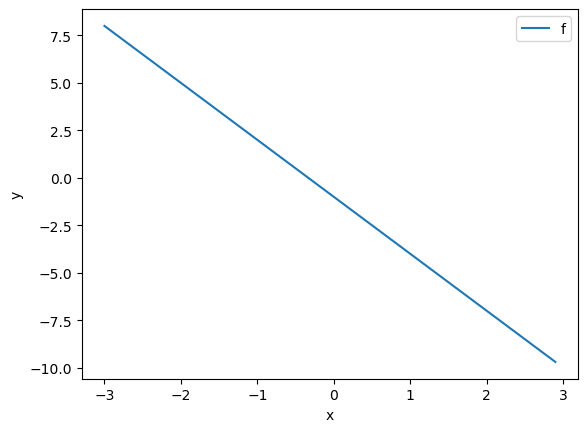

In [4]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

让我们对x加一点噪声,然后把Y画出来：

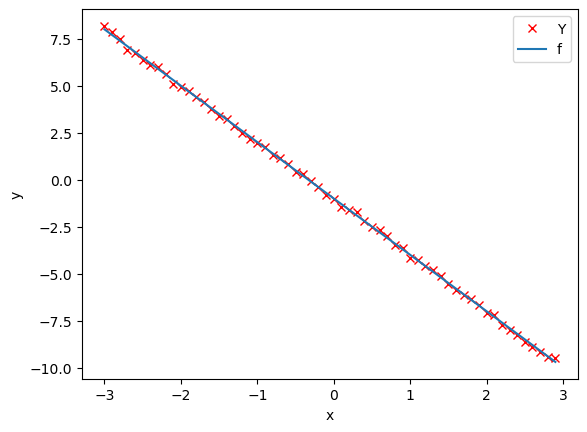

In [5]:
Y = f + 0.1 * torch.randn(X.shape)

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

创造w参数、前向传播、MSE损失函数、学习率，y = w * x

In [6]:
# 创造w
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-5.0, requires_grad=True)

# 创造前向传播
def forward(x):
    return w * x + b

# 创造MSE损失函数
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

# 创造学习率
lr = 0.05
LOSS = []

In [7]:
def train_model(it):
    for epoch in range(it):
        yhat = forward(X)
        loss = criterion(yhat, Y)
        
        LOSS.append(loss.item())

        print('Epoch',it,' loss的值为：',loss.item(),' w的值为：',w,' b的值为',b)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

In [8]:
train_model(40)

Epoch 40  loss的值为： 160.17507934570312  w的值为： tensor(-10., requires_grad=True)  b的值为 tensor(-5., requires_grad=True)
Epoch 40  loss的值为： 83.97032928466797  w的值为： tensor(-7.9190, requires_grad=True)  b的值为 tensor(-4.6362, requires_grad=True)
Epoch 40  loss的值为： 45.60873031616211  w的值为： tensor(-6.4608, requires_grad=True)  b的值为 tensor(-4.2984, requires_grad=True)
Epoch 40  loss的值为： 25.97456169128418  w的值为： tensor(-5.4386, requires_grad=True)  b的值为 tensor(-3.9871, requires_grad=True)
Epoch 40  loss的值为： 15.670990943908691  w的值为： tensor(-4.7217, requires_grad=True)  b的值为 tensor(-3.7018, requires_grad=True)
Epoch 40  loss的值为： 10.066718101501465  w的值为： tensor(-4.2185, requires_grad=True)  b的值为 tensor(-3.4414, requires_grad=True)
Epoch 40  loss的值为： 6.869402885437012  w的值为： tensor(-3.8651, requires_grad=True)  b的值为 tensor(-3.2046, requires_grad=True)
Epoch 40  loss的值为： 4.936579704284668  w的值为： tensor(-3.6166, requires_grad=True)  b的值为 tensor(-2.9896, requires_grad=True)
Epoch 40  loss的值为： 3.6925735

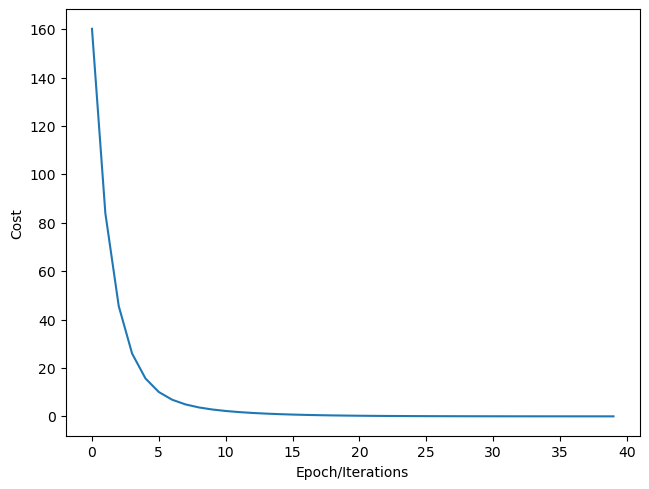

In [9]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost')
plt.show()